# CP5 - Aprendizado de Máquina Supervisionado

### Instruções:

1) Neste Jupyter Notebook há 2 questões de Aprendizado de Máquina Supervisionado para as tarefas de Regressão e Classificação. Cada questão possui uma pontuação indicada em vermelho, somando 10 pontos ao final;

2) O CP é em grupo de até **4 pessoas da mesma bancada**;

3) Preencham o nome de cada membro do grupo corretamente;

4) Coloque seu código solução logo abaixo de cada questão que ele responde;

5) Use células markdown para escrever respostas que forem pedidas ou que você achar pertinentes;

6) Você pode e **deve** usar bibliotecas prontas. Ao importar uma biblioteca, comente na frente para o que ela serve;

7) Apenas um aluno submeterá no Teams. Mude o nome do arquivo para **CP5-turma-NomeSobrenome.ipynb** onde **turma** deve ser trocado pela turma do grupo (A, F, J, H, etc) e o NomeSobrenome trocado pelo nome e sobrenome do aluno que submeter o arquivo;

8) A atividade tem previsão de **1h50 de duração**.


### Atenção:
Vocês podem usar trechos de códigos prontos, entretanto é pouco provável que dois grupos tenham códigos **totalmente iguais**, nas mesmas sequências com as mesmas respostas. Caso for constatada semelhança exagerada entre dois arquivos que indique **plágio**, a nota  <font color='red'> será zerada!</font>

## Grupo [nome do grupo] Turma: [turma]
- **Nome:** nome sobrenome **RM:**
- **Nome:** nome sobrenome **RM:**
- **Nome:** nome sobrenome **RM:**


------------------------------

## 1) Drone <font color='red'>(4 pontos)</font>

No arquivo drone_data.csv, você recebeu dados consolidados de vários voos realizados pelo mesmo drone usado para entregas.

- **flight:** número do voo;
- **speed:** velocidade média durante o voo (m/s)
- **payload:** peso da carga transportada (g)
- **altitude:** altitude de cruzeiro predefinida (m)
- **date:** data do voo
- **local_time:** horário em que o voo ocorreu 
- **route** sigla da rota que o drone voou
- **total_energy:** energia total consumida da bateria (J)
- **mean_wind_speed:** velocidade média do vento (m/s)
- **flight_duration:** tempo total de duração do voo (s)

Estes são dados de um drone quadcoptero real utilizado para entrega de pacotes. O dataset foi disponibilizado online no KiltHub em 2020. Seguem os autores e link para o repositório original:

Rodrigues, Thiago A.; Patrikar, Jay; Choudhry, Arnav; Feldgoise, Jacob; Arcot, Vaibhav; Gahlaut, Aradhana; et al. (2020): Data Collected with Package Delivery Quadcopter Drone. Carnegie Mellon University. Dataset. https://doi.org/10.1184/R1/12683453.v3


 (a) Crie um modelo de Aprendizado de Máquina para prever a rota (**route**) que o drone tomou baseado nos atributos de voo. Você deve obter uma Acurácia de pelo menos 90% no conjunto de teste. Lembre-se de balancear os dados entre as classes ao realizar a separação treino e teste.  <font color='red'>(2 pontos)</font>

In [9]:
import pandas as pd

dados_drone = pd.read_csv('drone_data.csv', sep = ',')
dados_drone.head(10)

,flight,speed,payload,altitude,date,local_time,route,total_energy,mean_wind_speed,flight_duration
0,1,4.0,0.0,25,2019-04-07,10:13,non R1,78473,3.90,200.70
1,2,4.0,0.0,50,2019-04-07,10:23,non R1,91363,3.52,271.20
2,3,6.0,0.0,25,2019-04-07,10:33,non R1,61487,4.58,180.10
3,4,8.0,0.0,25,2019-04-07,10:48,non R1,52915,4.60,171.00
4,5,4.0,0.0,25,2019-04-07,11:05,non R1,68589,3.33,217.00
5,6,4.0,0.0,25,2019-04-07,11:18,non R1,72413,4.03,204.49
6,7,4.0,0.0,25,2019-05-06,15:43,non R1,77475,4.88,179.61
7,8,4.0,0.0,25,2019-05-06,15:56,R1,78936,2.91,233.50
8,10,6.0,0.0,25,2019-05-06,16:08,R1,59571,5.11,138.09
9,12,10.0,0.0,25,2019-05-06,16:19,R1,46745,6.00,116.21


(b) Crie um modelo de Aprendizado de Máquina para prever a energia consumida da bateria (**total_energy**) do drone durante o voo. Você deve obter um R² de pelo menos 0.8. <font color='red'>(2 pontos)</font>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = dados_drone[['speed', 'payload', 'altitude', 'mean_wind_speed', 'flight_duration']]
y = dados_drone['total_energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.2f}')



R²: 0.85


R²: 0.85


--------------------------------------------
## 2) Counter Strike <font color='red'>(6 pontos)</font>

No arquivo cs_data.csv há dados de jogadores de CS.

(a) Crie um modelo de Aprendizado de Máquina capaz de prever o **Score** do jogador com o menor número de colunas possível, mantendo um R² de teste maior do que 0.9. Quais foram as colunas selecionadas? Faz sentido?  <font color='red'>(1.5 pontos)</font>

In [28]:
dados_cs = pd.read_csv('cs_data.csv', sep = ',')
dados_cs.head()

,Player Name,Ping,Kills,Assists,Deaths,MVP,HSP,Score
0,DNB,45,38,4,20,8,42,90
1,link1n,31,22,3,17,5,54,51
2,sn0w,42,14,4,20,0,40,42
3,reedkihaddi,90,13,3,23,0,28,33
4,pEhnol,33,11,4,27,0,54,26


(b) Diversos jogadores de CS dizem que morrem no jogo **apenas** por causa do **ping** (atraso devido a problemas de rede).

**Usando um modelo de Aprendizado de Máquina**, digam se isso é verdade ou não. <font color='red'>(1.5 pontos)</font>

In [45]:
# Variáveis independentes (Ping, Kills, Assists)
X = dados_cs[['Ping', 'Kills', 'Assists','Score']]
y = dados_cs['Deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

ping_coef = model.coef_[0]
print(f'Coeficiente do Ping: {ping_coef}')

R²: 0.07000829170088263
Coeficiente do Ping: 0.010112163068994557


(c) Usando os dados, descubra uma forma de **demonstrar que o ping é importante**.  <font color='red'>(3 pontos)</font>

In [35]:
## Coloque seu código aqui  
dados_cs.drop(columns = ['Player Name', 'HSP'])
dados_cs.head(20)

,Player Name,Ping,Kills,Assists,Deaths,MVP,HSP,Score
0,DNB,45,38,4,20,8,42,90
1,link1n,31,22,3,17,5,54,51
2,sn0w,42,14,4,20,0,40,42
3,reedkihaddi,90,13,3,23,0,28,33
4,pEhnol,33,11,4,27,0,54,26
5,Gilmour,21,26,2,19,3,22,65
6,MattY,26,26,4,19,5,19,61
7,Tangenbergggg,15,25,6,21,2,12,58
8,ZOMB!E,22,15,6,22,3,20,46
9,FanTage,18,13,5,22,2,46,37


   Ping  Kills  Assists  Deaths  MVP  HSP  Score
0    45     38        4      20    8   42     90
1    31     22        3      17    5   54     51
2    42     14        4      20    0   40     42
3    90     13        3      23    0   28     33
4    33     11        4      27    0   54     26
             Ping     Kills   Assists    Deaths       MVP       HSP     Score
Ping     1.000000  0.021426  0.017515  0.088751 -0.007893  0.004439  0.028844
Kills    0.021426  1.000000  0.213080  0.143051  0.710617  0.024167  0.961946
Assists  0.017515  0.213080  1.000000  0.242187  0.167351  0.006493  0.332584
Deaths   0.088751  0.143051  0.242187  1.000000 -0.070031  0.051621  0.159385
MVP     -0.007893  0.710617  0.167351 -0.070031  1.000000  0.017155  0.724866
HSP      0.004439  0.024167  0.006493  0.051621  0.017155  1.000000  0.016165
Score    0.028844  0.961946  0.332584  0.159385  0.724866  0.016165  1.000000


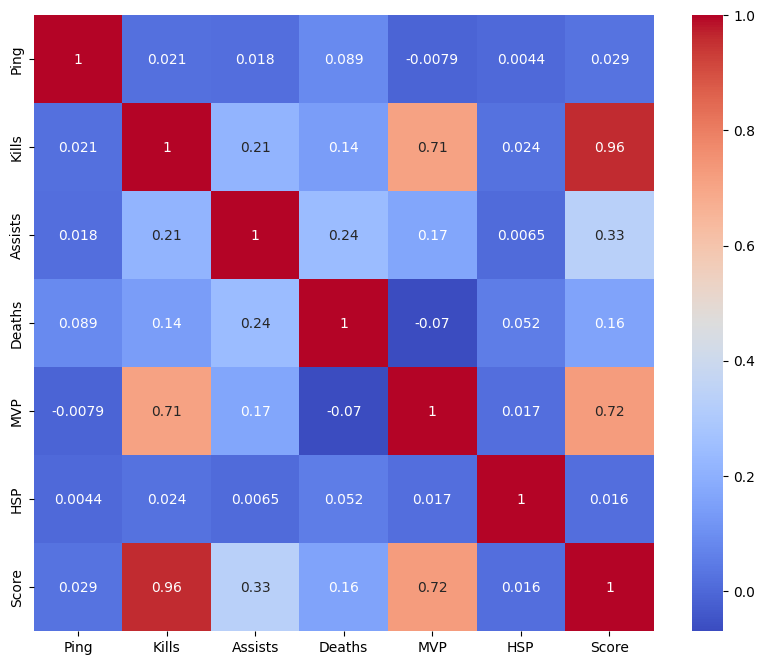

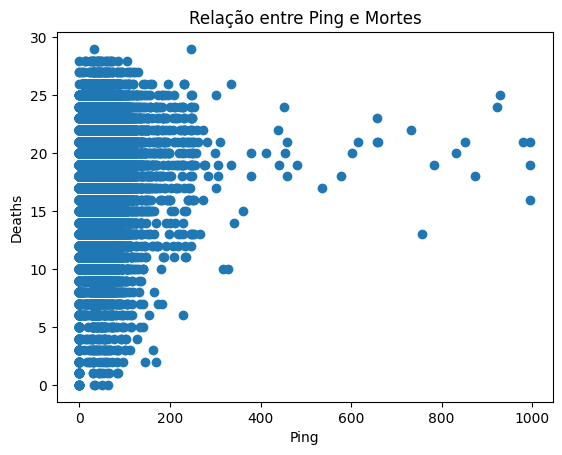

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar os primeiros dados
print(dados_cs.head())

# Calcular a correlação
correlation = dados_cs.corr()

# Mostrar a matriz de correlação
print(correlation)

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# Scatter plot para visualizar a relação entre Ping e Deaths
plt.scatter(dados_cs['Ping'], dados_cs['Deaths'])
plt.xlabel('Ping')
plt.ylabel('Deaths')
plt.title('Relação entre Ping e Mortes')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Variáveis independentes e dependente
X = dados_cs[['Ping']]
y = dados_cs['Deaths']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular o R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Coeficiente do modelo
ping_coef = model.coef_[0]
print(f'Coeficiente do Ping: {ping_coef}')


R²: 0.0034958734270035263
Coeficiente do Ping: 0.010755839200468227
